In [1]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="D90rVo7ahGyBHqpqtBIH")
project = rf.workspace("indian-institute-of-information-technology-sricity").project("guava-h98xp")
dataset = project.version(6).download("tensorflow")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0
  Attempting uninstall: certifi
    Found existing installati

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to guava-6 in tensorflow:: 100%|██████████| 505/505 [00:00<00:00, 7240.71it/s]


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.preprocessing import FunctionTransformer,LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tensorflow13GcsFileSystemE']


In [3]:
def load_data(dir , df):
    # Load images and labels into arrays
    images = []
    labels = []

    for index, row in df.iterrows():
        image_file_path = os.path.join(dir, row['filename'])
        image = cv2.imread(image_file_path)
        if image is not None:
            resized_image = cv2.resize(image, (img_size, img_size))  # Resize to a fixed size
            resized_image = np.array(resized_image) / 255.0
        images.append(resized_image)
        labels.append(row['target'])

    # Convert lists to numpy arrays
    return np.array(images) , np.array(labels)

In [4]:
img_size = 350
batch_size = 8

In [5]:
dir = "/kaggle/working/guava-6/train"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

train_data, train_labels = load_data(dir , df)

print("Loaded data shape:", train_data.shape)
print("Loaded labels shape:", train_labels.shape)


Loaded data shape: (430, 350, 350, 3)
Loaded labels shape: (430,)


In [6]:
dir = "/kaggle/working/guava-6/test"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['class'])

test_data, test_labels = load_data(dir , df)

print("Loaded data shape:", test_data.shape)
print("Loaded labels shape:", test_labels.shape)

Loaded data shape: (26, 350, 350, 3)
Loaded labels shape: (26,)


In [7]:
dir = "/kaggle/working/guava-6/valid"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

valid_data, valid_labels = load_data(dir , df)

print("Loaded data shape:", valid_data.shape)
print("Loaded labels shape:", valid_labels.shape)

Loaded data shape: (42, 350, 350, 3)
Loaded labels shape: (42,)


In [8]:
# Encode train_labels, valid_labels, and test_labels using one-hot encoding
train_labels_encoded = to_categorical(train_labels)
valid_labels_encoded = to_categorical(valid_labels)
test_labels_encoded = to_categorical(test_labels)

In [9]:
def create_basic_cnn_model(input_shape, num_classes):
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the feature maps
    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [10]:
input_shape = (img_size, img_size, 3)
num_classes = 2 
model = create_basic_cnn_model(input_shape, num_classes)
epochs = 10

history = model.fit(train_data, train_labels_encoded, batch_size=batch_size, epochs=epochs, validation_data=(valid_data, valid_labels_encoded))

Epoch 1/10
54/54 [==============================] - 15s 53ms/step - loss: 2.4234 - accuracy: 0.6093 - val_loss: 0.9637 - val_accuracy: 0.6190
Epoch 2/10
54/54 [==============================] - 2s 36ms/step - loss: 0.4889 - accuracy: 0.7651 - val_loss: 0.3731 - val_accuracy: 0.8810
Epoch 3/10
54/54 [==============================] - 2s 36ms/step - loss: 0.3952 - accuracy: 0.8349 - val_loss: 0.3983 - val_accuracy: 0.8571
Epoch 4/10
54/54 [==============================] - 2s 37ms/step - loss: 0.2428 - accuracy: 0.9070 - val_loss: 0.3657 - val_accuracy: 0.8571
Epoch 5/10
54/54 [==============================] - 2s 36ms/step - loss: 0.2068 - accuracy: 0.9186 - val_loss: 0.7980 - val_accuracy: 0.6667
Epoch 6/10
54/54 [==============================] - 2s 38ms/step - loss: 0.1653 - accuracy: 0.9349 - val_loss: 0.3983 - val_accuracy: 0.8333
Epoch 7/10
54/54 [==============================] - 2s 36ms/step - loss: 0.1054 - accuracy: 0.9674 - val_loss: 0.6527 - val_accuracy: 0.7857
Epoch 8/10
5

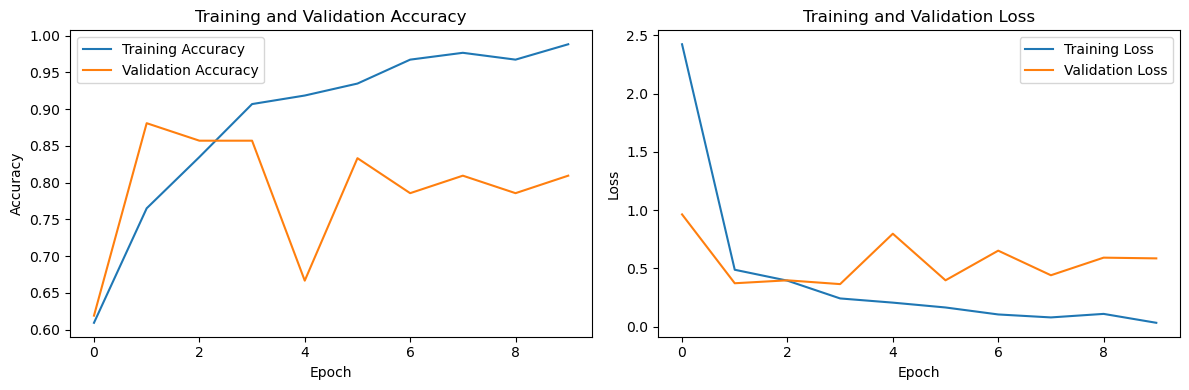

In [11]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()

# Save the plots as images
plt.savefig('training_history.png')

# Show the plots
plt.show()

In [12]:
# Function to generate and save a confusion matrix
def save_confusion_matrix(data, labels, title, filename):
    predictions = model.predict(data)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, predicted_labels)
    cm = confusion_matrix(labels, predicted_labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{title} (Accuracy: {accuracy:.2f})')
    plt.savefig(filename)
    plt.show()

14/14 [==============================] - 2s 65ms/step


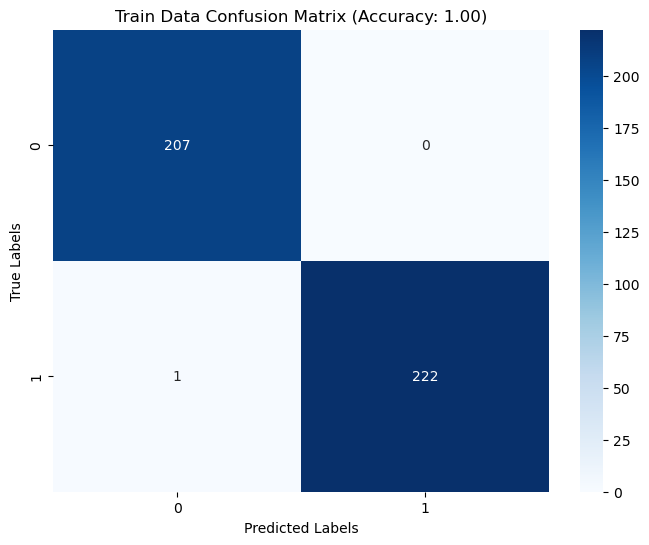

2/2 [==============================] - 0s 233ms/step


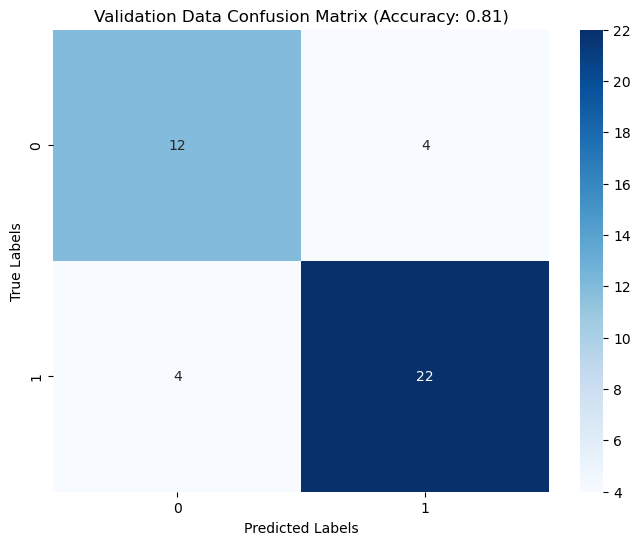

1/1 [==============================] - 1s 537ms/step


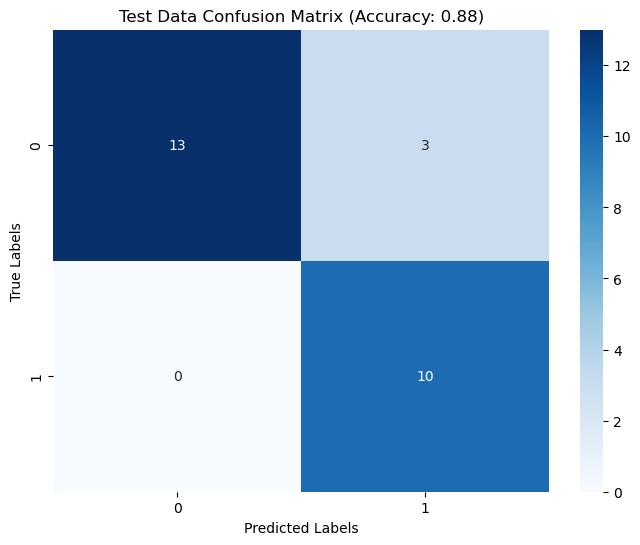

In [13]:
# Save confusion matrices for train, validation, and test data
save_confusion_matrix(train_data, train_labels, "Train Data Confusion Matrix", "train_confusion_matrix.png")
save_confusion_matrix(valid_data, valid_labels, "Validation Data Confusion Matrix", "valid_confusion_matrix.png")
save_confusion_matrix(test_data, test_labels, "Test Data Confusion Matrix", "test_confusion_matrix.png")

In [14]:
# Save the model with a custom name
model.save("custom_model.h5")